<a href="https://colab.research.google.com/github/Kalaiselvan7324/Machine-Learning-with-scikit-learn/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear** **Regression Practise**
### Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x))

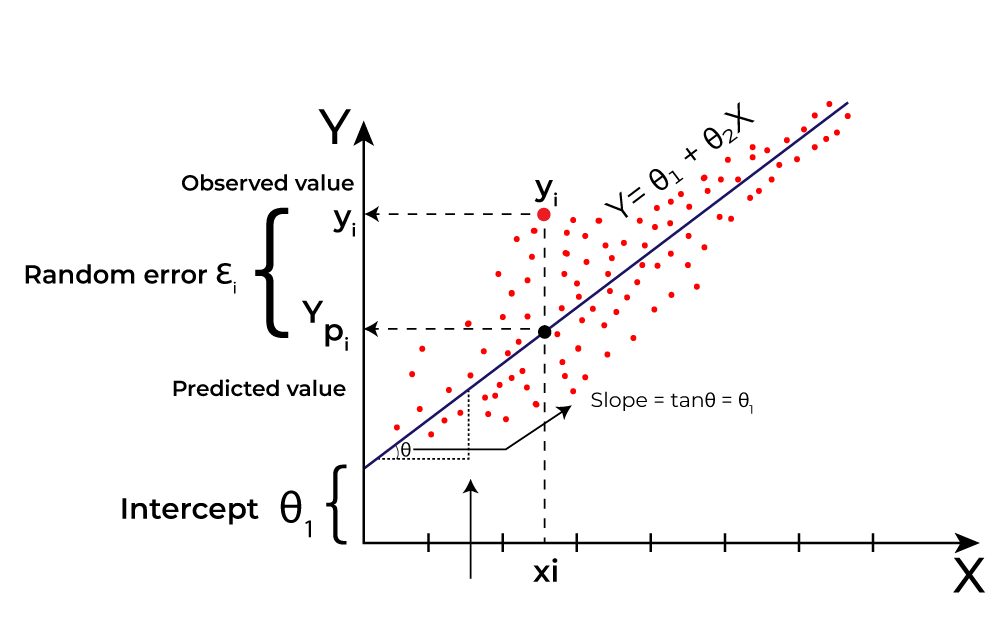


### x = independent variable
### y = dependent/target variable

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7d89394873d0>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


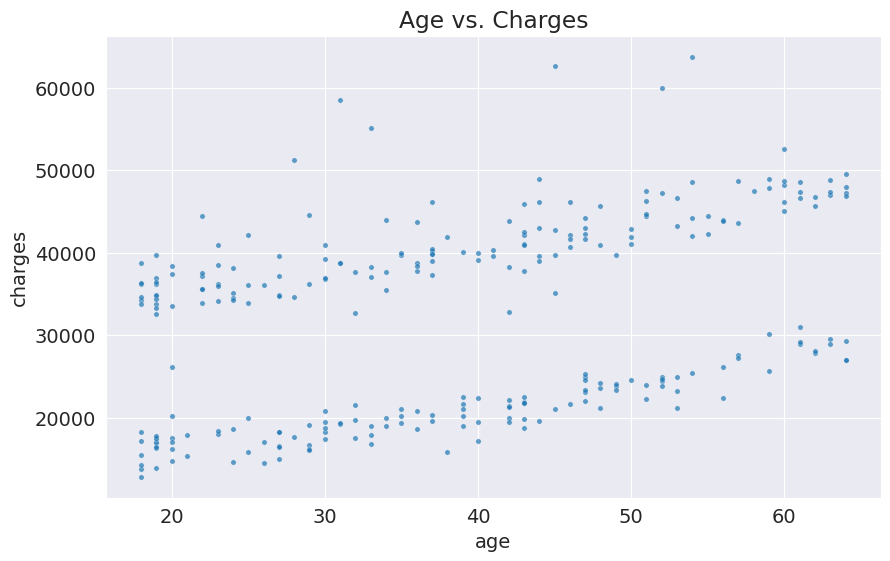

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data= smoker_df, x='age', y='charges', alpha=0.7, s=15);

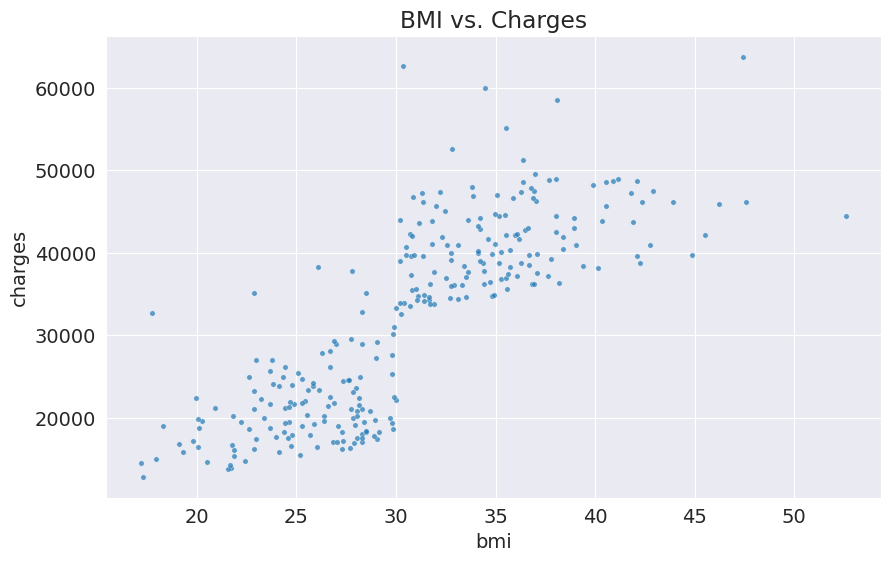

In [ ]:
plt.title('BMI vs. Charges')
sns.scatterplot(data= smoker_df, x='bmi', y='charges', alpha=0.7, s=15);

In [ ]:
px.violin(smoker_df, x='children', y = 'charges', color = 'children', box = True, points = 'all')

In [ ]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
inputs =  smoker_df[['age']]
targets = smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (274, 1)
targes.shape : (274,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
predictions = model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
rmse(targets, predictions)

10711.00334810241

In [ ]:
# w
model.coef_

array([305.23760211])

In [ ]:
# b
model.intercept_

20294.128126915966

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
ages = smoker_df.age

In [ ]:
def try_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

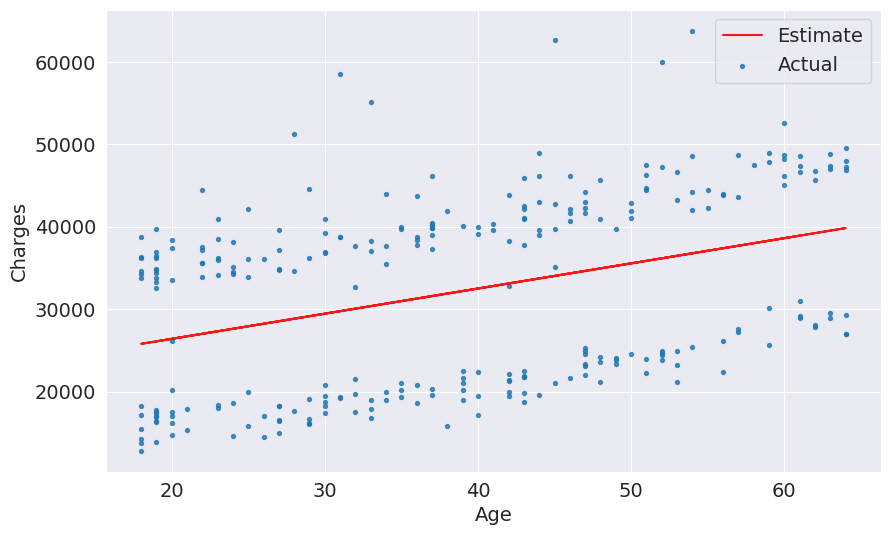

In [ ]:
try_parameters(model.coef_, model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

> **EXERCISE**: Use the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

SGDRegressor RMSE: 1344868675.6526146


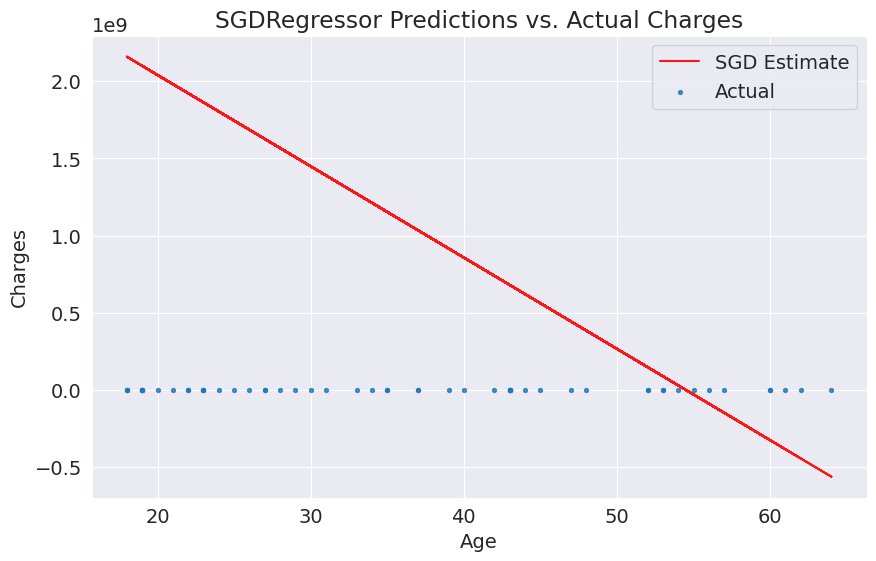

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

# Assuming 'inputs' and 'targets' are defined as in the previous code
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Create and train the SGDRegressor model
sgd_model = SGDRegressor(random_state=42) # You can adjust hyperparameters here
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)

# Compute the RMSE for the SGD model
sgd_rmse = rmse(y_test, sgd_predictions)

print(f"SGDRegressor RMSE: {sgd_rmse}")

# You can visualize the predictions like before, but now with the test set
plt.plot(X_test, sgd_predictions, 'r', alpha=0.9);
plt.scatter(X_test, y_test, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['SGD Estimate', 'Actual']);
plt.title('SGDRegressor Predictions vs. Actual Charges');
plt.show()